# Feature Transformation
# Mathematical Transformation

In [1]:
import pandas as pd
df=pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [3]:
df['Units Returned']

0       2
1       0
2       0
3       0
4       3
       ..
4379    1
4380    1
4381    3
4382    2
4383    0
Name: Units Returned, Length: 4384, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()

In [5]:
cat_col=df.select_dtypes(exclude='number').columns

In [6]:
cat_col

Index(['Date', 'Product Name', 'Category', 'Location', 'Platform'], dtype='object')

In [7]:
for col in cat_col:
    if df[col].nunique() <= 5:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    else:
        df[col] = lb_encoder.fit_transform(df[col])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4384 non-null   int32  
 1   Product Name      4384 non-null   int32  
 2   Category          4384 non-null   int32  
 3   Units Sold        4384 non-null   int64  
 4   Price             4384 non-null   float64
 5   Revenue           4384 non-null   float64
 6   Discount          4384 non-null   float64
 7   Units Returned    4384 non-null   int64  
 8   Location_Canada   4384 non-null   int32  
 9   Location_UK       4384 non-null   int32  
 10  Location_USA      4384 non-null   int32  
 11  Platform_Amazon   4384 non-null   int32  
 12  Platform_Walmart  4384 non-null   int32  
 13  Platform_iHerb    4384 non-null   int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 325.5 KB


# Feature Engineering

In [9]:
# Feature Engineering

df['Avg_Selling_Price'] = df['Revenue'] / df['Units Sold']
# Har bir mahsulot birligining ortacha sotilgan narxini hisoblash.
# Daromad (Revenue) ni sotilgan birliklar (Units Sold) soniga bolish.

df['Net_Revenue'] = df['Revenue'] - df['Discount']
# Sof daromadni hisoblash.
# Umumiy daromaddan (Revenue) chegirmalarni (Discount) ayirish.

df['Return_Rate'] = df['Units Returned'] / df['Units Sold']
# Qaytarilgan mahsulotlar ulushini hisoblash.
# Qaytarilgan birliklar sonini (Units Returned) sotilgan birliklar soniga (Units Sold) bolish.

df['Expected_Revenue'] = df['Price'] * df['Units Sold']
# Kutilayotgan daromadni hisoblash.
# Narx (Price) ni sotilgan birliklar soniga (Units Sold) kopaytirish.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4384 non-null   int32  
 1   Product Name       4384 non-null   int32  
 2   Category           4384 non-null   int32  
 3   Units Sold         4384 non-null   int64  
 4   Price              4384 non-null   float64
 5   Revenue            4384 non-null   float64
 6   Discount           4384 non-null   float64
 7   Units Returned     4384 non-null   int64  
 8   Location_Canada    4384 non-null   int32  
 9   Location_UK        4384 non-null   int32  
 10  Location_USA       4384 non-null   int32  
 11  Platform_Amazon    4384 non-null   int32  
 12  Platform_Walmart   4384 non-null   int32  
 13  Platform_iHerb     4384 non-null   int32  
 14  Avg_Selling_Price  4384 non-null   float64
 15  Net_Revenue        4384 non-null   float64
 16  Return_Rate        4384 

# Mathematical Transformation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def plot_feature_distributions(df,features):    # Numeric featurelar
    for feature in features:
        plt.figure(figsize=(8,6))
        sns.histplot(df[feature],kde=True)
        plt.title('Feature Distribution')

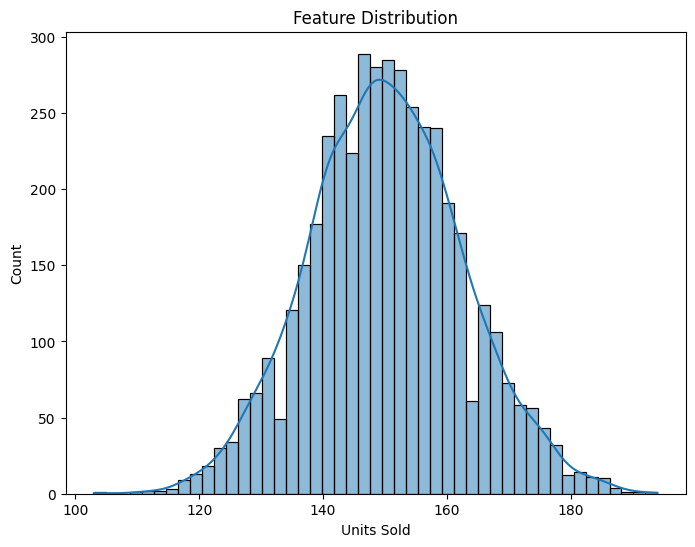

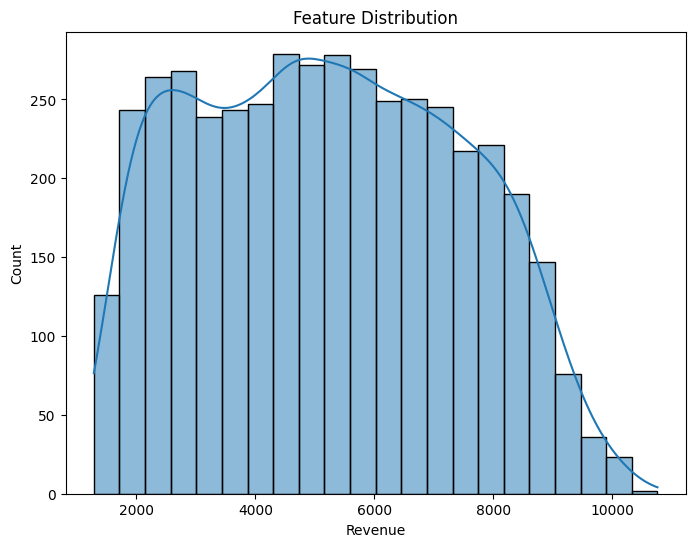

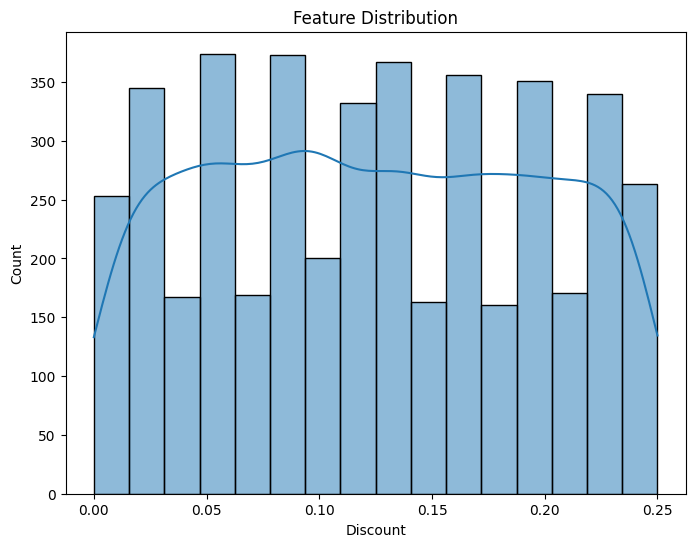

In [13]:
plot_feature_distributions(df,['Units Sold','Revenue','Discount'])

In [14]:
df['Units Sold'].value_counts()

Units Sold
147    159
150    156
148    149
153    147
158    141
      ... 
190      1
103      1
113      1
194      1
109      1
Name: count, Length: 81, dtype: int64

In [15]:
# Skewness(og'ishni aniqlash)     agar featurelar soni oz bolsa 

def check_skew(df,features):
    for feature in features:
        skew=df[feature].skew()
        print(f"{feature}: skewness={skew:.2f}")

In [16]:
check_skew(df,['Revenue','Discount'])

Revenue: skewness=0.12
Discount: skewness=0.02


In [17]:
# Featurelar kop bolsa       skewnessni aniqlash
def check_skew_kop(df):

    for col in df.select_dtypes(include='number').columns:

        skew=df[col].skew()

        print(f" {col}: skewness:{skew:.2f}")

In [18]:
check_skew_kop(df)

 Date: skewness:0.00
 Product Name: skewness:0.00
 Category: skewness:-0.24
 Units Sold: skewness:0.08
 Price: skewness:0.01
 Revenue: skewness:0.12
 Discount: skewness:0.02
 Units Returned: skewness:0.83
 Location_Canada: skewness:0.66
 Location_UK: skewness:0.69
 Location_USA: skewness:0.77
 Platform_Amazon: skewness:0.69
 Platform_Walmart: skewness:0.76
 Platform_iHerb: skewness:0.67
 Avg_Selling_Price: skewness:0.01
 Net_Revenue: skewness:0.12
 Return_Rate: skewness:0.82
 Expected_Revenue: skewness:0.12


In [19]:
# Katta qiymatlarni log bilan
# kichik qiymatlarni sqrt bilan

# ogish 1 dan katta bolsa >1        va       -1dan kichik bolsa <-1       skewness kerak
# skewness >1 and <-1 =kerak

# ogish - 0.5dan katta bolsa -0.5<       va       0.5dan kichik bolsa <0.5     skewness kerak emas
# -0.5< skewness < 0.5 =kerak  emas

# Ideal holatda, skewness 0 ga yaqin bo‘lishi kerak (ya’ni, simmetrik taqsimot).
#  Agar |skewness| > 0.5 yoki 1 bo‘lsa, bu sezilarli og‘ish (skew) borligini bildiradi

In [20]:
result=check_skew_kop(df)

 Date: skewness:0.00
 Product Name: skewness:0.00
 Category: skewness:-0.24
 Units Sold: skewness:0.08
 Price: skewness:0.01
 Revenue: skewness:0.12
 Discount: skewness:0.02
 Units Returned: skewness:0.83
 Location_Canada: skewness:0.66
 Location_UK: skewness:0.69
 Location_USA: skewness:0.77
 Platform_Amazon: skewness:0.69
 Platform_Walmart: skewness:0.76
 Platform_iHerb: skewness:0.67
 Avg_Selling_Price: skewness:0.01
 Net_Revenue: skewness:0.12
 Return_Rate: skewness:0.82
 Expected_Revenue: skewness:0.12


In [21]:
for col in ['Location_Canada','Location_UK','Location_USA','Platform_Amazon','Platform_Walmart','Platform_iHerb','Return_Rate']:
    if col in df.columns:
        df[col+'_log']=np.log1p(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  4384 non-null   int32  
 1   Product Name          4384 non-null   int32  
 2   Category              4384 non-null   int32  
 3   Units Sold            4384 non-null   int64  
 4   Price                 4384 non-null   float64
 5   Revenue               4384 non-null   float64
 6   Discount              4384 non-null   float64
 7   Units Returned        4384 non-null   int64  
 8   Location_Canada       4384 non-null   int32  
 9   Location_UK           4384 non-null   int32  
 10  Location_USA          4384 non-null   int32  
 11  Platform_Amazon       4384 non-null   int32  
 12  Platform_Walmart      4384 non-null   int32  
 13  Platform_iHerb        4384 non-null   int32  
 14  Avg_Selling_Price     4384 non-null   float64
 15  Net_Revenue          

In [23]:
df.drop(['Location_Canada','Location_UK','Location_USA','Platform_Amazon','Platform_Walmart','Platform_iHerb','Return_Rate'],axis=1,inplace=True)
# bu yerda kop ustunlarni drop qilishimiz uchun ularni list ichiga yozyapmiz.
# agar 1 yoki 2ta ustunni drop qilmoqchi bolsak list shart emas

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  4384 non-null   int32  
 1   Product Name          4384 non-null   int32  
 2   Category              4384 non-null   int32  
 3   Units Sold            4384 non-null   int64  
 4   Price                 4384 non-null   float64
 5   Revenue               4384 non-null   float64
 6   Discount              4384 non-null   float64
 7   Units Returned        4384 non-null   int64  
 8   Avg_Selling_Price     4384 non-null   float64
 9   Net_Revenue           4384 non-null   float64
 10  Expected_Revenue      4384 non-null   float64
 11  Location_Canada_log   4384 non-null   float64
 12  Location_UK_log       4384 non-null   float64
 13  Location_USA_log      4384 non-null   float64
 14  Platform_Amazon_log   4384 non-null   float64
 15  Platform_Walmart_log 

# Time Based Transformation

In [25]:
df['Date']

0         0
1         0
2         0
3         0
4         0
       ... 
4379    273
4380    273
4381    273
4382    273
4383    273
Name: Date, Length: 4384, dtype: int32

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4384 non-null   datetime64[ns]
 1   Product Name          4384 non-null   int32         
 2   Category              4384 non-null   int32         
 3   Units Sold            4384 non-null   int64         
 4   Price                 4384 non-null   float64       
 5   Revenue               4384 non-null   float64       
 6   Discount              4384 non-null   float64       
 7   Units Returned        4384 non-null   int64         
 8   Avg_Selling_Price     4384 non-null   float64       
 9   Net_Revenue           4384 non-null   float64       
 10  Expected_Revenue      4384 non-null   float64       
 11  Location_Canada_log   4384 non-null   float64       
 12  Location_UK_log       4384 non-null   float64       
 13  Location_USA_log  

In [28]:
df.drop('Date',axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Name          4384 non-null   int32  
 1   Category              4384 non-null   int32  
 2   Units Sold            4384 non-null   int64  
 3   Price                 4384 non-null   float64
 4   Revenue               4384 non-null   float64
 5   Discount              4384 non-null   float64
 6   Units Returned        4384 non-null   int64  
 7   Avg_Selling_Price     4384 non-null   float64
 8   Net_Revenue           4384 non-null   float64
 9   Expected_Revenue      4384 non-null   float64
 10  Location_Canada_log   4384 non-null   float64
 11  Location_UK_log       4384 non-null   float64
 12  Location_USA_log      4384 non-null   float64
 13  Platform_Amazon_log   4384 non-null   float64
 14  Platform_Walmart_log  4384 non-null   float64
 15  Platform_iHerb_log   

In [30]:
df['Units Returned']

0       2
1       0
2       0
3       0
4       3
       ..
4379    1
4380    1
4381    3
4382    2
4383    0
Name: Units Returned, Length: 4384, dtype: int64

In [31]:
# Scaling

num_col=df.select_dtypes(include='number').columns

In [32]:
num_col

Index(['Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Avg_Selling_Price', 'Net_Revenue',
       'Expected_Revenue', 'Location_Canada_log', 'Location_UK_log',
       'Location_USA_log', 'Platform_Amazon_log', 'Platform_Walmart_log',
       'Platform_iHerb_log', 'Return_Rate_log', 'Year', 'Month', 'Day'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
# y qiymatdan boshqa barcha ustunlarni scaling qiladi
for col in df.columns:
    if col!='Units Returned':
        df[col]=scaler.fit_transform(df[[col]])

In [ ]:
df[num_col]=scaler.fit_transform(df[num_col])    # bu cod kerak emas

In [35]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Avg_Selling_Price,Net_Revenue,Expected_Revenue,Location_Canada_log,Location_UK_log,Location_USA_log,Platform_Amazon_log,Platform_Walmart_log,Platform_iHerb_log,Return_Rate_log,Year,Month,Day
0,1.410048,0.631169,-0.580916,-0.197316,-0.298064,-1.315034,2,-0.197316,-0.298021,-0.298064,1.381699,-0.712072,-0.685678,-0.711345,1.450798,-0.720822,0.460603,0.0,0.0,0.0
1,1.193118,1.352504,-0.903635,0.544407,0.311243,-1.175727,0,0.544407,0.311282,0.311243,-0.723747,1.404352,-0.685678,1.405788,-0.689276,-0.720822,-1.227955,0.0,0.0,0.0
2,-0.325396,-0.090167,0.871319,-1.540587,-1.436000,1.749735,0,-1.540587,-1.436057,-1.436000,1.381699,-0.712072,-0.685678,1.405788,-0.689276,-0.720822,-1.227955,0.0,0.0,0.0
3,0.759257,1.352504,-0.822955,-1.318000,-1.357865,-0.618496,0,-1.318000,-1.357845,-1.357865,1.381699,-0.712072,-0.685678,-0.711345,1.450798,-0.720822,-1.227955,0.0,0.0,0.0
4,0.976187,0.270501,0.548600,0.048516,0.156105,1.749735,3,0.048516,0.156048,0.156105,1.381699,-0.712072,-0.685678,-0.711345,-0.689276,1.387305,1.073204,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop('Units Returned',axis=1)

In [38]:
y=df['Units Returned']

In [39]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr_model=LogisticRegression()

In [42]:
lr_model

LogisticRegression()

In [43]:
lr_model.fit(x_train,y_train)

C:\Users\xolmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=lr_model.predict(x_val)

In [45]:
y_pred

array([0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 3, 0, 3, 1, 2, 1, 3, 4, 3, 1, 1, 2, 1, 3, 1, 2, 2, 1,
       1, 0, 0, 3, 1, 2, 4, 2, 1, 2, 2, 2, 0, 0, 3, 0, 1, 3, 2, 1, 2, 3,
       2, 2, 2, 0, 2, 1, 3, 3, 2, 2, 2, 4, 3, 1, 0, 1, 1, 1, 1, 3, 2, 1,
       2, 2, 0, 1, 3, 3, 2, 2, 0, 1, 3, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1,
       2, 0, 4, 0, 4, 3, 3, 1, 2, 4, 1, 2, 1, 4, 0, 0, 2, 3, 4, 2, 4, 3,
       1, 1, 0, 2, 2, 1, 2, 0, 2, 4, 2, 0, 2, 3, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 4, 0, 1, 3, 1, 5, 1, 0, 1, 3, 2, 1, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 4, 0, 0, 2,
       1, 2, 3, 4, 4, 3, 1, 2, 4, 2, 1, 1, 2, 4, 1, 2, 1, 2, 2, 0, 4, 3,
       3, 3, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 0, 1, 5, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 2, 1, 0, 2, 3, 1,
       4, 0, 1, 1, 1, 2, 4, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 3, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 0, 1, 3, 3, 2, 1, 0, 1,

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
acc1=accuracy_score(y_val,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [439, 438]

In [ ]:
print(len(y_val))   # kerak: 438          qiymatlarni tekshirish
print(len(y_test))  # kerak: 438

439
438


In [ ]:
y_val = y_val[:len(y_test)]         # y_val ni qisqartirish
# Aksincha bolsa    y_test = y_test[:len(y_val)]          # y_test ni qisqartirish

In [ ]:
print(len(y_val))   # kerak: 438        qiymatlarni tekshirish
print(len(y_test))  # kerak: 438

438
438


In [51]:
acc1=accuracy_score(y_val,y_test)

In [ ]:
acc1        # Natija yaxshi chiqmadi shuncha harakat qilsa ham

0.2237442922374429

In [ ]:
# Mathematical Transformingsiz natijani korish

In [1]:
import pandas as pd
df=pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()

In [4]:
cat_col=df.select_dtypes(exclude='number').columns

In [5]:
cat_col

Index(['Date', 'Product Name', 'Category', 'Location', 'Platform'], dtype='object')

In [6]:
for col in cat_col:
    if df[col].nunique() <= 5:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    else:
        df[col] = lb_encoder.fit_transform(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4384 non-null   int32  
 1   Product Name      4384 non-null   int32  
 2   Category          4384 non-null   int32  
 3   Units Sold        4384 non-null   int64  
 4   Price             4384 non-null   float64
 5   Revenue           4384 non-null   float64
 6   Discount          4384 non-null   float64
 7   Units Returned    4384 non-null   int64  
 8   Location_Canada   4384 non-null   int32  
 9   Location_UK       4384 non-null   int32  
 10  Location_USA      4384 non-null   int32  
 11  Platform_Amazon   4384 non-null   int32  
 12  Platform_Walmart  4384 non-null   int32  
 13  Platform_iHerb    4384 non-null   int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 325.5 KB


In [8]:
# Feature Engineering

df['Avg_Selling_Price'] = df['Revenue'] / df['Units Sold']
# Har bir mahsulot birligining ortacha sotilgan narxini hisoblash.
# Daromad (Revenue) ni sotilgan birliklar (Units Sold) soniga bolish.

df['Net_Revenue'] = df['Revenue'] - df['Discount']
# Sof daromadni hisoblash.
# Umumiy daromaddan (Revenue) chegirmalarni (Discount) ayirish.

df['Return_Rate'] = df['Units Returned'] / df['Units Sold']
# Qaytarilgan mahsulotlar ulushini hisoblash.
# Qaytarilgan birliklar sonini (Units Returned) sotilgan birliklar soniga (Units Sold) bolish.

df['Expected_Revenue'] = df['Price'] * df['Units Sold']
# Kutilayotgan daromadni hisoblash.
# Narx (Price) ni sotilgan birliklar soniga (Units Sold) kopaytirish.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4384 non-null   int32  
 1   Product Name       4384 non-null   int32  
 2   Category           4384 non-null   int32  
 3   Units Sold         4384 non-null   int64  
 4   Price              4384 non-null   float64
 5   Revenue            4384 non-null   float64
 6   Discount           4384 non-null   float64
 7   Units Returned     4384 non-null   int64  
 8   Location_Canada    4384 non-null   int32  
 9   Location_UK        4384 non-null   int32  
 10  Location_USA       4384 non-null   int32  
 11  Platform_Amazon    4384 non-null   int32  
 12  Platform_Walmart   4384 non-null   int32  
 13  Platform_iHerb     4384 non-null   int32  
 14  Avg_Selling_Price  4384 non-null   float64
 15  Net_Revenue        4384 non-null   float64
 16  Return_Rate        4384 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
num_col=df.select_dtypes(include='number').columns

In [12]:
num_col

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location_Canada', 'Location_UK',
       'Location_USA', 'Platform_Amazon', 'Platform_Walmart', 'Platform_iHerb',
       'Avg_Selling_Price', 'Net_Revenue', 'Return_Rate', 'Expected_Revenue'],
      dtype='object')

In [13]:
# y qiymatdan boshqa barcha ustunlarni scaling qiladi
for col in df.columns:
    if col!='Units Returned':
        df[col]=scaler.fit_transform(df[[col]])

In [14]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location_Canada,Location_UK,Location_USA,Platform_Amazon,Platform_Walmart,Platform_iHerb,Avg_Selling_Price,Net_Revenue,Return_Rate,Expected_Revenue
0,-1.725741,1.410048,0.631169,-0.580916,-0.197316,-0.298064,-1.315034,2,1.381699,-0.712072,-0.685678,-0.711345,1.450798,-0.720822,-0.197316,-0.298021,0.455845,-0.298064
1,-1.725741,1.193118,1.352504,-0.903635,0.544407,0.311243,-1.175727,0,-0.723747,1.404352,-0.685678,1.405788,-0.689276,-0.720822,0.544407,0.311282,-1.221848,0.311243
2,-1.725741,-0.325396,-0.090167,0.871319,-1.540587,-1.436000,1.749735,0,1.381699,-0.712072,-0.685678,1.405788,-0.689276,-0.720822,-1.540587,-1.436057,-1.221848,-1.436000
3,-1.725741,0.759257,1.352504,-0.822955,-1.318000,-1.357865,-0.618496,0,1.381699,-0.712072,-0.685678,-0.711345,1.450798,-0.720822,-1.318000,-1.357845,-1.221848,-1.357865
4,-1.725741,0.976187,0.270501,0.548600,0.048516,0.156105,1.749735,3,1.381699,-0.712072,-0.685678,-0.711345,-0.689276,1.387305,0.048516,0.156048,1.070287,0.156105


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop('Units Returned',axis=1)

In [17]:
y=df['Units Returned']

In [18]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr_model2=LogisticRegression()

In [21]:
lr_model2

LogisticRegression()

In [22]:
lr_model2.fit(x_train,y_train)

C:\Users\xolmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=lr_model2.predict(x_val)

In [26]:
y_pred

array([0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 3, 0, 3, 1, 2, 1, 3, 4, 3, 1, 1, 2, 1, 3, 1, 2, 2, 1,
       1, 0, 0, 3, 1, 2, 4, 2, 1, 2, 2, 2, 0, 0, 3, 0, 1, 3, 2, 1, 2, 3,
       2, 2, 2, 0, 2, 1, 3, 3, 2, 2, 2, 4, 3, 1, 0, 1, 1, 1, 1, 3, 2, 1,
       2, 2, 0, 1, 3, 3, 2, 2, 0, 1, 3, 1, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1,
       2, 0, 4, 0, 4, 3, 3, 1, 2, 4, 1, 2, 1, 4, 0, 0, 2, 3, 4, 2, 4, 3,
       1, 1, 0, 2, 2, 1, 2, 0, 2, 4, 2, 0, 2, 3, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 4, 0, 1, 3, 1, 4, 1, 0, 1, 3, 2, 1, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 4, 0, 0, 2,
       1, 2, 3, 4, 4, 3, 1, 2, 4, 2, 1, 1, 2, 4, 1, 2, 1, 2, 2, 0, 4, 3,
       3, 3, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 0, 1, 5, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 2, 1, 0, 2, 3, 1,
       4, 0, 1, 1, 1, 2, 4, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 3, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 0, 1, 3, 3, 2, 1, 0, 1,

In [27]:
from sklearn.metrics import accuracy_score

In [ ]:
acc2=accuracy_score(y_val,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [438, 439]

In [29]:
print(len(y_val))   # kerak: 438          qiymatlarni tekshirish
print(len(y_test))  # kerak: 438

439
438


In [30]:
y_val = y_val[:len(y_test)]         # y_val ni qisqartirish
# Aksincha bolsa    y_test = y_test[:len(y_val)]          # y_test ni qisqartirish

In [31]:
print(len(y_val))   # kerak: 438          qiymatlarni tekshirish
print(len(y_test))  # kerak: 438

438
438


In [32]:
acc2=accuracy_score(y_val,y_test)

In [ ]:
acc2     # baribir natija osha osha

0.2237442922374429